# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [4]:
df = pd.read_csv('../../data/processed/transformed_random_flight_data.csv')
df

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,fl_date,arr_delay,Key,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon
0,1610,UA,11618,13495,1167,11618-13495,3,1,2019-03-01,0.0,40.692501-40.692501,0.8,1.3,30.0,15.9,40.692501,-74.168701
1,4909,C5,11618,14524,277,11618-14524,12,6,2019-12-06,-17.0,40.692501-40.692501,5.7,0.0,0.0,12.2,40.692501,-74.168701
2,3556,YX,11618,11193,569,11618-11193,4,3,2018-04-03,-9.0,40.692501-40.692501,4.9,5.8,30.0,11.1,40.692501,-74.168701
3,1382,AA,11618,11298,1372,11618-11298,9,7,2019-09-07,68.0,40.692501-40.692501,20.4,0.0,0.0,6.3,40.692501,-74.168701
4,3517,YX,11618,13495,1167,11618-13495,2,5,2018-02-05,-37.0,40.692501-40.692501,0.3,0.0,0.0,13.4,40.692501,-74.168701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,5026,OO,11092,11292,283,11092-11292,9,22,2019-09-22,0.0,38.75500107-38.75500107,16.0,0.0,0.0,0.0,38.755001,-109.754997
97303,5031,OO,11092,11292,283,11092-11292,8,10,2019-08-10,-12.0,38.75500107-38.75500107,27.3,0.0,0.0,0.0,38.755001,-109.754997
97304,5079,OO,11092,11292,283,11092-11292,8,15,2018-08-15,2.0,38.75500107-38.75500107,28.5,0.0,0.0,10.7,38.755001,-109.754997
97305,5031,OO,11092,11292,283,11092-11292,5,26,2019-05-26,-22.0,38.75500107-38.75500107,18.3,0.0,0.0,11.4,38.755001,-109.754997


In [7]:
# drop rows with missing values
df = df.dropna().reset_index(drop=True)
df.shape

(97307, 17)

In [5]:
# df['route'].value_counts()
# df['op_carrier_fl_num'].value_counts()
# df['op_unique_carrier'].value_counts()
df['Key'].value_counts()

33.6367-33.6367                      4909
41.9786-41.9786                      4785
32.896801-32.896801                  3468
39.861698150635-39.861698150635      3328
35.2140007019043-35.2140007019043    3028
                                     ... 
58.4253006-58.4253006                   1
34.898899-34.898899                     1
-14.331--14.331                         1
59.04470062-59.04470062                 1
39.707901-39.707901                     1
Name: Key, Length: 353, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# fit and transform the data
df['op_unique_carrier'] = le.fit_transform(df['op_unique_carrier'])
df['route'] = le.fit_transform(df['route'])
df['Key'] = le.fit_transform(df['Key'])
df

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,fl_date,arr_delay,Key,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon
0,1610,22,11618,13495,1167,1887,3,1,2019-03-01,0.0,207,0.8,1.3,30.0,15.9,40.692501,-74.168701
1,4909,6,11618,14524,277,1903,12,6,2019-12-06,-17.0,207,5.7,0.0,0.0,12.2,40.692501,-74.168701
2,3556,26,11618,11193,569,1853,4,3,2018-04-03,-9.0,207,4.9,5.8,30.0,11.1,40.692501,-74.168701
3,1382,2,11618,11298,1372,1857,9,7,2019-09-07,68.0,207,20.4,0.0,0.0,6.3,40.692501,-74.168701
4,3517,26,11618,13495,1167,1887,2,5,2018-02-05,-37.0,207,0.3,0.0,0.0,13.4,40.692501,-74.168701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,5026,19,11092,11292,283,1043,9,22,2019-09-22,0.0,169,16.0,0.0,0.0,0.0,38.755001,-109.754997
97303,5031,19,11092,11292,283,1043,8,10,2019-08-10,-12.0,169,27.3,0.0,0.0,0.0,38.755001,-109.754997
97304,5079,19,11092,11292,283,1043,8,15,2018-08-15,2.0,169,28.5,0.0,0.0,10.7,38.755001,-109.754997
97305,5031,19,11092,11292,283,1043,5,26,2019-05-26,-22.0,169,18.3,0.0,0.0,11.4,38.755001,-109.754997


In [7]:
df.columns.tolist()

['op_carrier_fl_num',
 'op_unique_carrier',
 'origin_airport_id',
 'dest_airport_id',
 'distance',
 'route',
 'month',
 'day',
 'fl_date',
 'arr_delay',
 'Key',
 'AvgTemp',
 'Precipitation',
 'Snow_mm',
 'WindSpeed',
 'lat',
 'lon']

In [20]:
# X = df.drop(['op_unique_carrier','origin_airport_id', 'dest_airport_id','day','fl_date','Key','lat','lon','arr_delay'], axis=1)
X = df.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date','arr_delay'], axis=1)
y = df['arr_delay']

                   op_carrier_fl_num  origin_airport_id  distance     route  \
op_carrier_fl_num           1.000000          -0.021725 -0.360852 -0.018880   
origin_airport_id          -0.021725           1.000000  0.065652  0.996283   
distance                   -0.360852           0.065652  1.000000  0.068647   
route                      -0.018880           0.996283  0.068647  1.000000   
month                       0.011208          -0.004020  0.001494 -0.004048   
AvgTemp                    -0.077079           0.011714  0.050612  0.011281   
Precipitation               0.000282          -0.037302 -0.009797 -0.037522   
Snow_mm                     0.010457          -0.008375 -0.015987 -0.008296   
WindSpeed                  -0.017120           0.004950  0.049889  0.012863   
lon                         0.141006          -0.285054 -0.129459 -0.285162   

                      month   AvgTemp  Precipitation   Snow_mm  WindSpeed  \
op_carrier_fl_num  0.011208 -0.077079       0.000282 

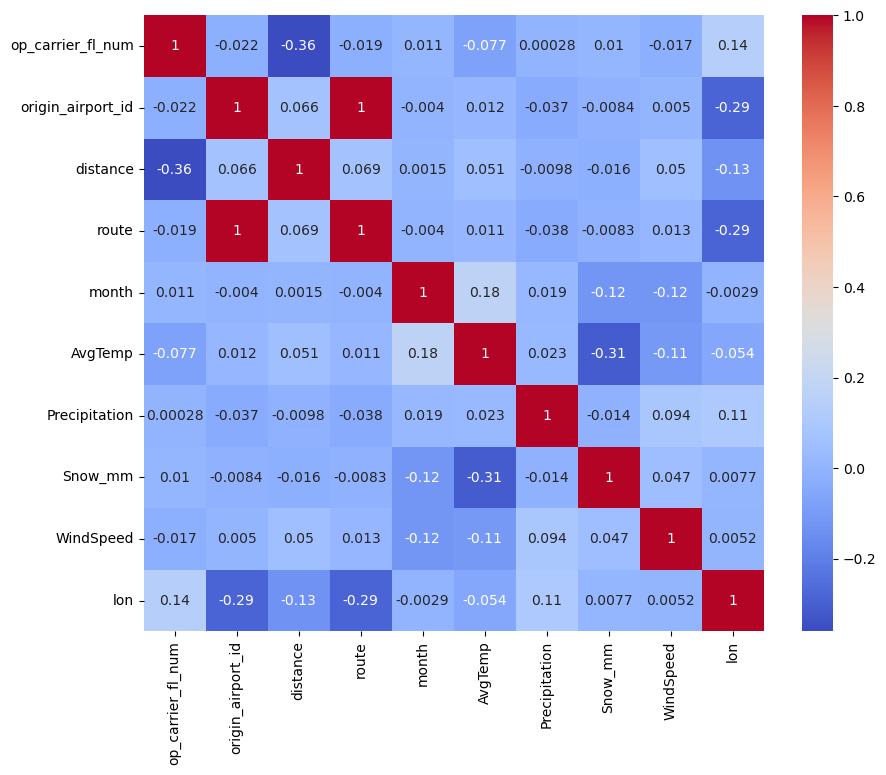

In [29]:
# Assuming your independent variables are stored in a pandas DataFrame called X
corr_matrix = X.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
#Set figure size to fit all variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [31]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
# train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# evaluate the model on the testing dataset
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2753.37543486463


In [34]:
from scipy import stats

In [35]:
r_sq = lr_model.score(X_train, y_train)
r_sq

0.011189779058696003

In [36]:
from sklearn.feature_selection import f_regression

# Get the number of features in the model
n_features = X_train.shape[1]
n_features

10

In [37]:
# Calculate the adjusted R-squared value
n_samples = X_train.shape[0]
adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)
adj_r_sq

0.011062738148432949

In [58]:
# Calculate the F-statistic and corresponding p-values for each feature
f_stats, p_values = f_regression(X_train, y_train)

#make a list of independent variable columns names
cols = X.columns.tolist()

# zip the array and list into a list of tuples
data = list(zip(cols, f_stats, p_values))

# create a DataFrame of the results
model_results = pd.DataFrame(data, columns=['Feature', 'F Stats', 'P Values'])
model_results


,Feature,F Stats,P Values
0,op_carrier_fl_num,41.769215,1.033122e-10
1,origin_airport_id,7.751790,5.367229e-03
2,distance,26.330764,2.883589e-07
3,route,7.208416,7.257788e-03
4,month,7.618926,5.777238e-03
5,AvgTemp,8.695341,3.191192e-03
6,Precipitation,698.708639,2.724787e-153
7,Snow_mm,45.781797,1.331174e-11
8,WindSpeed,65.685365,5.365736e-16
9,lon,35.789490,2.207867e-09


## Test Regression Model with Test Data

In [48]:
df1 = pd.read_csv('../../data/processed/transformed_week1_2020.csv')
df1

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,day,Key,fl_date,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon,Month
0,5390,WN,14057,11292,991.0,14057-11292,1,45.58869934-45.58869934,2020-01-01,10.8,3.8,0.0,11.9,45.588699,-122.598000,1
1,5752,CP,14057,14747,129.0,14057-14747,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
2,789,UA,14057,11292,991.0,14057-11292,2,45.58869934-45.58869934,2020-01-02,8.2,1.0,0.0,11.9,45.588699,-122.598000,1
3,1184,AS,14057,14679,933.0,14057-14679,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
4,1552,AS,14057,14262,873.0,14057-14262,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,OO,14006,13930,342.0,14006-13930,6,37.06079864501953-37.06079864501953,2020-01-06,5.3,0.0,0.0,7.9,37.060799,-88.773804,1
9912,5081,OO,13121,13930,489.0,13121-13930,2,37.8582992554-37.8582992554,2020-01-02,1.9,0.0,0.0,1.8,37.858299,-80.399498,1
9913,3845,MQ,11905,11298,140.0,11905-11298,2,32.38399887084961-32.38399887084961,2020-01-02,12.1,4.6,0.0,11.9,32.383999,-94.711502,1
9914,4258,OO,12003,14869,463.0,12003-14869,6,47.48199844-47.48199844,2020-01-06,0.1,0.0,0.0,26.3,47.481998,-111.371002,1


In [49]:
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
le = LabelEncoder()

# fit and transform the data
df1['op_unique_carrier'] = le.fit_transform(df1['op_unique_carrier'])
df1['route'] = le.fit_transform(df1['route'])
df1

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,day,Key,fl_date,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon,Month
0,5390,21,14057,11292,991.0,2701,1,45.58869934-45.58869934,2020-01-01,10.8,3.8,0.0,11.9,45.588699,-122.598000,1
1,5752,6,14057,14747,129.0,2728,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
2,789,20,14057,11292,991.0,2701,2,45.58869934-45.58869934,2020-01-02,8.2,1.0,0.0,11.9,45.588699,-122.598000,1
3,1184,2,14057,14679,933.0,2727,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
4,1552,2,14057,14262,873.0,2724,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,17,14006,13930,342.0,2672,6,37.06079864501953-37.06079864501953,2020-01-06,5.3,0.0,0.0,7.9,37.060799,-88.773804,1
9912,5081,17,13121,13930,489.0,2028,2,37.8582992554-37.8582992554,2020-01-02,1.9,0.0,0.0,1.8,37.858299,-80.399498,1
9913,3845,14,11905,11298,140.0,1383,2,32.38399887084961-32.38399887084961,2020-01-02,12.1,4.6,0.0,11.9,32.383999,-94.711502,1
9914,4258,17,12003,14869,463.0,1430,6,47.48199844-47.48199844,2020-01-06,0.1,0.0,0.0,26.3,47.481998,-111.371002,1


In [50]:
X_2020 = df1.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date'], axis=1)
X_2020.shape

(9916, 10)

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_2020_scaled = scaler.fit_transform(X_2020)

In [54]:
y_2020_pred = lr_model.predict(X_2020_scaled)
y_2020_pred.shape

(9916,)

In [55]:
X_2020['arr_delay'] = y_2020_pred
X_2020

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
0,5390,14057,991.0,2701,10.8,3.8,0.0,11.9,-122.598000,1,4.256354
1,5752,14057,129.0,2728,11.3,2.8,0.0,24.8,-122.598000,1,8.130897
2,789,14057,991.0,2701,8.2,1.0,0.0,11.9,-122.598000,1,1.330694
3,1184,14057,933.0,2727,11.3,2.8,0.0,24.8,-122.598000,1,4.865591
4,1552,14057,873.0,2724,11.3,2.8,0.0,24.8,-122.598000,1,5.120244
...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,14006,342.0,2672,5.3,0.0,0.0,7.9,-88.773804,1,5.383998
9912,5081,13121,489.0,2028,1.9,0.0,0.0,1.8,-80.399498,1,4.576550
9913,3845,11905,140.0,1383,12.1,4.6,0.0,11.9,-94.711502,1,6.394626
9914,4258,12003,463.0,1430,0.1,0.0,0.0,26.3,-111.371002,1,8.703073


In [56]:
X_2020.sort_values(['arr_delay'], ascending = False).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
9374,3617,11337,144.0,1098,-7.1,0.0,510.0,26.3,-92.193604,1,89.798094
9373,5150,11337,397.0,1099,-4.9,0.0,510.0,21.6,-92.193604,1,89.108926
9371,3685,11337,397.0,1099,-4.9,0.0,510.0,21.6,-92.193604,1,88.303525
9370,5186,11337,397.0,1099,-3.2,0.5,510.0,15.8,-92.193604,1,87.715108
9372,4025,11337,144.0,1098,-3.2,0.5,510.0,15.8,-92.193604,1,87.312420
9680,4600,11637,627.0,1277,-9.6,0.0,410.0,16.2,-96.815804,1,71.787104
9689,3654,11637,557.0,1279,-9.6,0.0,410.0,16.2,-96.815804,1,71.335119
9684,5203,11637,223.0,1278,-3.3,0.3,410.0,7.6,-96.815804,1,70.012766
9682,5203,11637,223.0,1278,-2.2,0.0,380.0,25.9,-96.815804,1,69.582193
9685,4183,11637,557.0,1279,-3.3,0.3,410.0,7.6,-96.815804,1,69.140591


In [57]:
X_2020.sort_values(['arr_delay']).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,Month,arr_delay
4416,344,12173,4817.0,1444,24.4,0.0,0.0,10.1,-157.924228,1,-6.176891
4380,448,12173,4983.0,1447,23.9,0.3,0.0,11.5,-157.924228,1,-5.833076
4434,218,12173,4243.0,1456,23.9,0.3,0.0,11.5,-157.924228,1,-5.255223
4451,8,12173,3784.0,1441,23.9,0.3,0.0,11.5,-157.924228,1,-4.960113
4397,102,12173,3784.0,1441,23.9,0.3,0.0,11.5,-157.924228,1,-4.908436
4453,201,12173,3801.0,1443,23.9,0.3,0.0,11.5,-157.924228,1,-4.867370
7531,596,13830,2935.0,2464,22.8,0.0,0.0,9.4,-156.431212,1,-4.601223
4420,383,12173,3365.0,1440,23.9,0.3,0.0,11.5,-157.924228,1,-4.362956
7519,42,13830,2338.0,2463,22.8,0.0,0.0,9.4,-156.431212,1,-4.348147
4395,362,12173,4962.0,1442,24.4,0.0,0.0,18.7,-157.924228,1,-4.247314


# Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [64]:
y = y[0:5000]

In [65]:
X = X[0:5000]

In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)

In [67]:
# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
# Fit the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Predict the labels of the test data
y_pred = rfc.predict(X_test)

In [72]:
# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.012
Classification Report:
               precision    recall  f1-score   support

       -48.0       0.00      0.00      0.00         1
       -44.0       0.00      0.00      0.00         0
       -43.0       0.00      0.00      0.00         2
       -42.0       0.00      0.00      0.00         1
       -41.0       0.00      0.00      0.00         0
       -39.0       0.00      0.00      0.00         0
       -38.0       0.00      0.00      0.00         0
       -37.0       0.00      0.00      0.00         1
       -36.0       0.00      0.00      0.00         1
       -35.0       0.00      0.00      0.00         4
       -34.0       0.00      0.00      0.00         2
       -33.0       0.00      0.00      0.00         4
       -32.0       0.00      0.00      0.00         3
       -31.0       0.00      0.00      0.00         7
       -30.0       0.00      0.00      0.00         5
       -29.0       0.00      0.00      0.00         8
       -28.0       0.00      0.00      0.

C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshl\anaconda3\lib\site-packages\sklearn\metrics\_cla

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.